In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
plt.style.use('bmh')

In [6]:
fast_ema = 21
slow_sma = 40
euro = yf.download("EURUSD=X","2019-10-01")
euro = euro.drop(["Open","High","Low","Adj Close","Volume"], axis=1)
euro.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-10-01,1.089966
2019-10-02,1.093494
2019-10-03,1.096371
2019-10-04,1.097538
2019-10-07,1.098660


In [11]:
euro["Fast"] = euro.Close.ewm(span=fast_ema, adjust = False).mean()
euro["Slow"] = euro.Close.rolling(slow_sma).mean()
euro["Diferencia"] = (euro.Fast - euro.Slow)
euro.dropna(inplace = True)
euro.head()

,Close,Fast,Slow,Diferencia
Date,,,,
2019-11-25,1.102256,1.105827,1.105521,0.000307
2019-11-26,1.101443,1.105429,1.105808,-0.000379
2019-11-27,1.102256,1.105140,1.106027,-0.000886
2019-11-28,1.100485,1.104717,1.106130,-0.001412
2019-11-29,1.101176,1.104395,1.106221,-0.001825


In [12]:
euro["Buy"] = (euro.Diferencia.shift(1) < 0) & (euro.Diferencia >= 0)
euro["Sell"] = (euro.Diferencia.shift(1) > 0) & (euro.Diferencia <= 0)
euro

,Close,Fast,Slow,Diferencia,Buy,Sell
Date,,,,,,
2019-11-25,1.102256,1.105827,1.105521,0.000307,False,False
2019-11-26,1.101443,1.105429,1.105808,-0.000379,False,True
2019-11-27,1.102256,1.105140,1.106027,-0.000886,False,False
2019-11-28,1.100485,1.104717,1.106130,-0.001412,False,False
2019-11-29,1.101176,1.104395,1.106221,-0.001825,False,False
...,...,...,...,...,...,...
2020-10-27,1.180944,1.178431,1.178274,0.000157,True,False
2020-10-28,1.178411,1.178429,1.177926,0.000503,False,False
2020-10-29,1.174867,1.178105,1.177680,0.000426,False,False


In [13]:
euro.Buy.sort_values(ascending=False)

Date
2020-03-30     True
2020-10-27     True
2020-03-06     True
2020-05-25     True
2019-12-16     True
              ...  
2020-07-03    False
2020-07-02    False
2020-07-01    False
2020-06-30    False
2019-11-25    False
Name: Buy, Length: 246, dtype: bool

In [14]:
euro.Sell.sort_values(ascending=False)

Date
2020-10-30     True
2020-09-21     True
2020-03-25     True
2020-04-03     True
2020-01-24     True
              ...  
2020-07-03    False
2020-07-02    False
2020-07-01    False
2020-06-30    False
2019-11-25    False
Name: Sell, Length: 246, dtype: bool

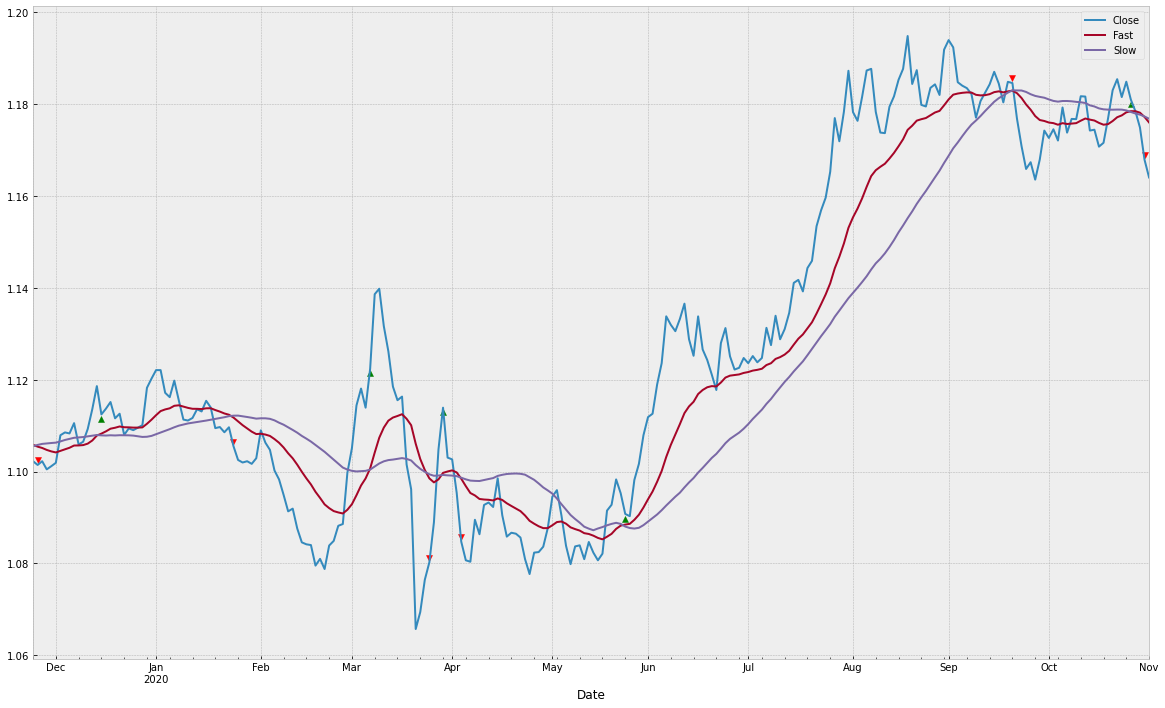

In [20]:
euro[['Close','Fast','Slow']].plot(figsize=(20,12))

plt.scatter(euro[euro.Buy == True].index,
         euro.Close[euro.Buy == True]-0.001,
         marker='^', color='green', label='Buy')

plt.scatter(euro[euro.Sell == True].index,
         euro.Close[euro.Sell == True]+0.001,
         marker='v', color='red', label='Sell')